## `Feature Scaling`


- **Feature Scaling** is the last thing we perform in a **Feature Engineering** pipeline.
- It is the step to perform after doing all the other things in **Feature Engineering** like missing value correction, handling categorical variables, detecting outliers. It is the step to perform just before passing the data to the model for training.
- The most important step in **Feature Scaling** is **`Standardization`**.
- **Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range.
- **Feature Scaling** is important where two features are of different types, like if we have two independent features one containg `Age` another containing `Salary`. Here though both have `int` type data but when we try to plot data points belong to these two columns there will be huge gap between them as they are calculated on different scales. So to make them under the same scale we need to **Scale** them under same range.
- Types of **Feature Scaling**:
    - **Standardization (Z-Score Normalization)**
    - **Normalization**

### `Standardization`

- This is also known as **Z-Score Normalization**.
- To standardize a column by transforming it using **Z-Score**.
- That is after standardizing the column the **Mean ($\mu$)** of the values in the column will be `0` and **Standard Deviation ($\sigma$)** will be `1`.
- So in **Standardization** whenever we transform a column then after transformationt there is one characteristic for sure to take place in the transformed column i.e. **$\mu$** = `0` and **$\sigma$** = `1`.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

df = pd.read_csv("datasets/Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
319,15623502,Male,36,60000,0
295,15725794,Female,36,63000,0
5,15728773,Male,27,58000,0
264,15600379,Male,48,90000,1
111,15660200,Female,37,71000,0


#### Here we will only work with the numerical data so let's drop the categorical columns

In [3]:
df.drop(columns=['User ID', 'Gender'], axis=1, inplace=True)
df.sample(5)

,Age,EstimatedSalary,Purchased
136,20,82000,0
92,26,15000,0
196,30,79000,0
283,52,21000,1
221,35,91000,1


### Creating independent and dependent features

In [4]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


### Train test split

- Whenever we need to perform **Feature Scaling** always perform the **train_test split** at first (recommended).

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### Scaling the data

- In **scikitlearn** we have a class named **StandardScaler**, this just do the same **Standardization** of the data as we discussed above. That is it transforms the columns using the **Z-Score**.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [7]:
# Checking the mean

scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
# Now transforming the training data

X_train_scaled = scaler.transform(X_train)

In [9]:
# Now transforming the test data

X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

**Notes**

- Whenever we pass dataframe to **StandardScaler** it returns a numpy array.
- Now we can convert it back to a dataframe to read it easily.

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
# Now it is a dataframe

X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [13]:
# Checking the details of the original dataset

np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
# Checking the details of the scaled dataset

np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Notes**

- Here in the original train data 
    - The **`mean`** of the `Age` is `37.9` and `EstimatedSalary` is `69807.1`
    - The **`Standard Deviation`** of the `Age` is `10.2` and `EstimatedSalary` is `34641.2`
  
  
  
- But in the scaled train data
    - The **`mean`** has become `0` and **`Standard Deviation`** become `1` for both the columns.
    
    
- So it shows that both the columns are now scaled under same range.

### Effect of scaling

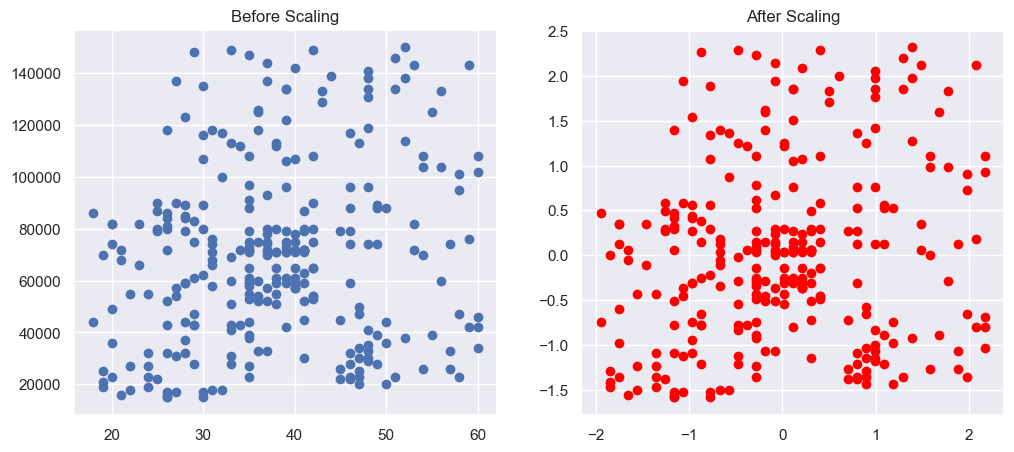

In [15]:
# Plotting Scatterplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

**Notes**

- We can see that there is no change in the distribution of the data points due to scaling. But the scale has now changed. So the data is now centered.

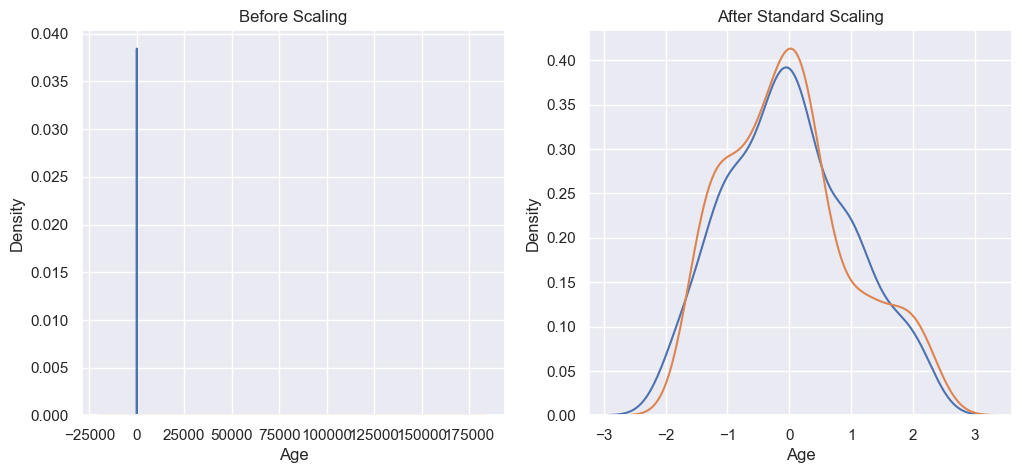

In [16]:
# Plotting PDF(Probability Density Function)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

**Notes:**

- Here we can see before scaling as the `Age` is in a very short range of scale so there is a spike in the `Age` but as `EstimatedSalary` has a bigger range so it is more flatten. So there is no comparison between these two as there is a huge difference in scales.
- But after scaling both the distribution has transformed, and now they are more comparable.
- So remember in **scaling the distribution remains the same only the scale gets changed**.

### Comparison of Individual Distributions

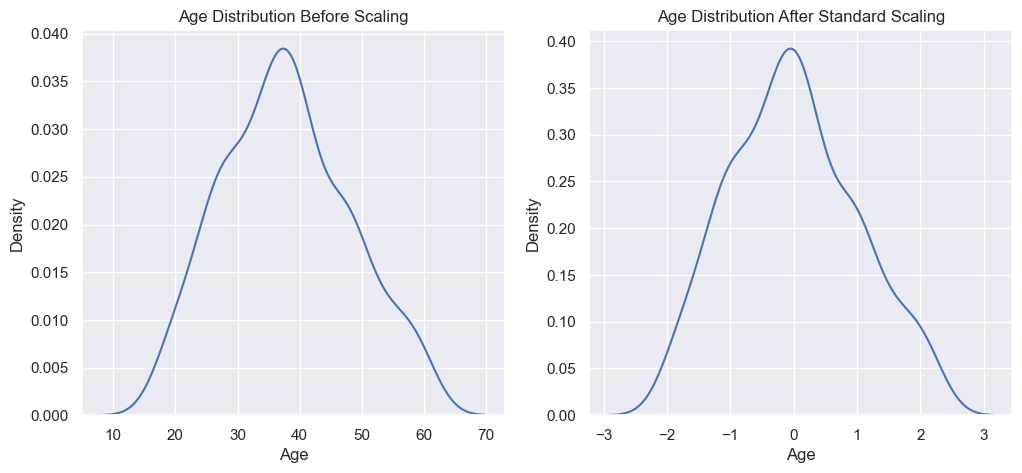

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

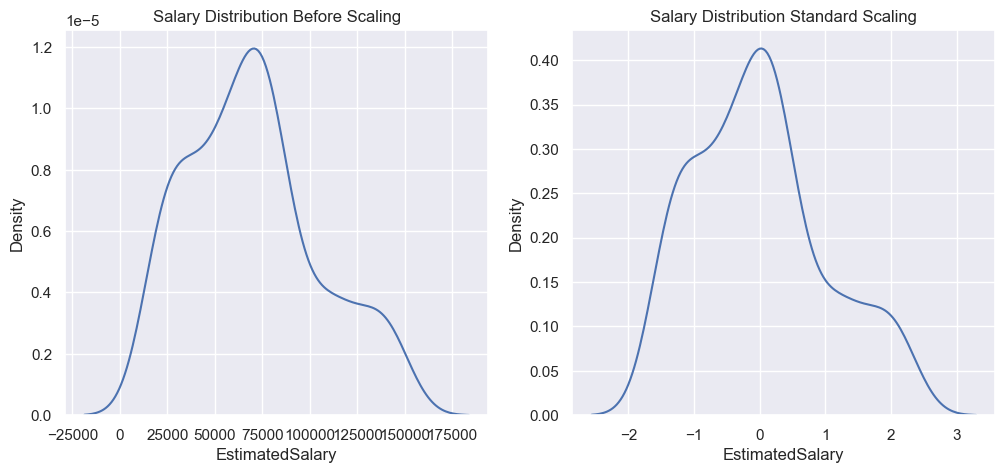

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

### Why scaling is important?

- Here we will show with an example of `LogisticRegression` model.
- Here we created 2 models both of `LogisticRegression` but one with normal data and another with scaled data.
- Then we will compare both of their accuracies.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
# training with unscaled data
lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
# training with scaled data
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
# doing predictions

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual data's accuracy score is: ",accuracy_score(y_test,y_pred))
print("Scaled data's accuracy score is: ",accuracy_score(y_test,y_pred_scaled))

Actual data's accuracy score is:  0.6583333333333333
Scaled data's accuracy score is:  0.8666666666666667


**Notes**:

- So it proves that in certain algorithms after scaling the accuracy improves drastically.

#### But the `scaling` has no impact in case of `DecisionTree` algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [29]:
# training with unscaled data
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
# training with scaled data
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [32]:
# doing predictions

y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [33]:
print("Actual data's accuracy score in Decision Tree algorithm is: ",accuracy_score(y_test,y_pred_dt))
print("Scaled data's accuracy score in Decision Tree algorithm is: ",accuracy_score(y_test,y_pred_scaled_dt))

Actual data's accuracy score in Decision Tree algorithm is:  0.875
Scaled data's accuracy score in Decision Tree algorithm is:  0.875


**Notes**:

- So we can see that there is no impact of `scaling` in case of `DecisionTree` algorithm.

In [34]:
# Checking the details about the original data

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Notes**

- So we can see the minimum value of `Age` is `18` and maximum is `60` in original data. Also the minimum value of `EstimatedSalary` is `15000` and maximum is `150000`.

### Effect of Outliers

In [35]:
# Let's put some outliers in the original dataset

df = df.append(pd.DataFrame({'Age':[5,90,95],
                             'EstimatedSalary':[1000,250000,350000],
                             'Purchased':[0,1,1]}), ignore_index=True)
df.sample(5)

,Age,EstimatedSalary,Purchased
381,48,33000,1
128,30,17000,0
294,35,57000,0
353,37,57000,0
24,46,23000,1


In [36]:
# Now again see the details

df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


**Notes**:

- Now we can see the count of data points increased from 400 to 403, and also the minimum and maximum values of independent features got changed.

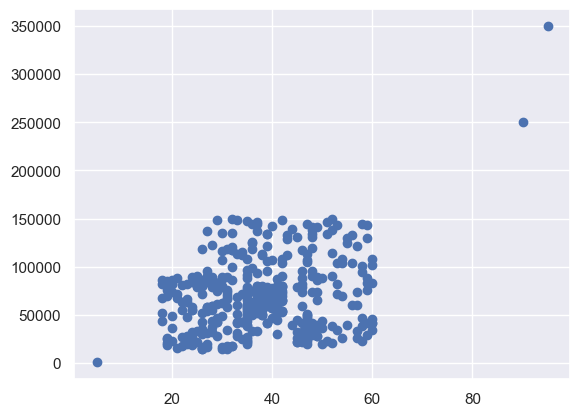

In [38]:
# Now let's plot the data

plt.scatter(df['Age'], df['EstimatedSalary'])
plt.show()

**Notes**:

- So now we can see some outlier points.

#### Now let's see what will happen if we again perform `Standardization` on this data

In [39]:
# Doing train test split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [40]:
# Performing scaling

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Creating dataframe of the scaled arrays

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

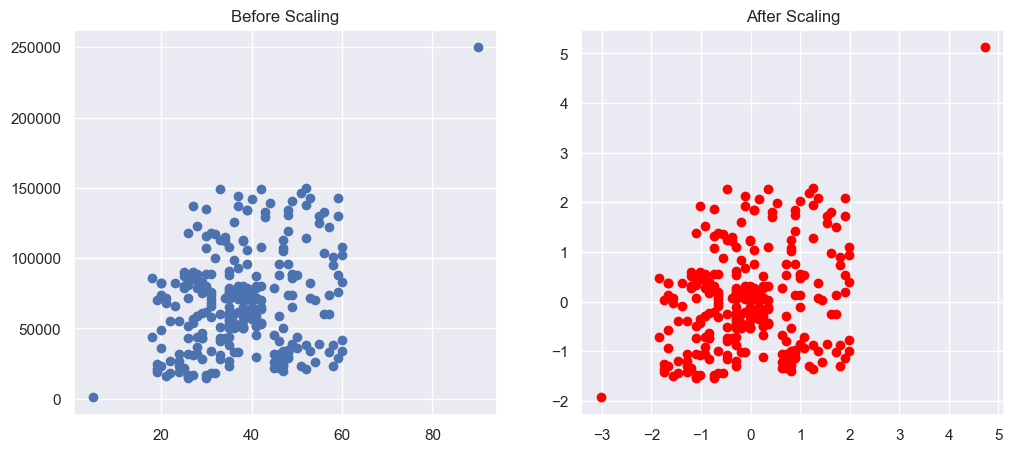

In [42]:
# again plotting to see the effects

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

**Notes**:

- Here we can see that the outliers remained same as earlier even after performing **Standardization**.
- So remember that **Standardization** has no impact on outliers.
- So even if we perform **Standardization** on a column which contains outlier, then it will not remove the outliers from the column and they remain same, though their scale will get changed.
- So we need to handle outliers explicitly.

### When to use `Standardization`?


- We can always use **`Standardization`** in case of the following algorithms :
    - **K-means** : It uses the `Euclidean` distance measure.
    - **K-Nearest-Neighbours** : Measure the distance between pairs of samples and these distances are influenced by the measurement units.
    - **Principal Component Analysis (PCA)**: Try to get the feature with maximum `Variance`.
    - **Artificial Neural Network (ANN)**: Apply `Gradient Descent`.
    - **Gradient Descent**: `Theta claculation` becomes faster after `Feature Scaling` and the `learning rate` in the update equation of `Stochastic Gradient Descent` is the same for every parameter.